# 911 Calls Project¶
For this capstone project we will be analyzing some 911 call data from Kaggle. The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

In [1]:
#Data Setup
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('911.csv')

In [32]:
#Top 5 zipcodes for 911 calls? 
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
count = df['title'].unique()
len(count) 

110

In [33]:
##Using .apply() with a custom lambda expression to create a new column called "Reason" that contains string values

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [7]:
#Finding the most common reason for 911 calls based on the Reason column 

df['Reason'].value_counts()


EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

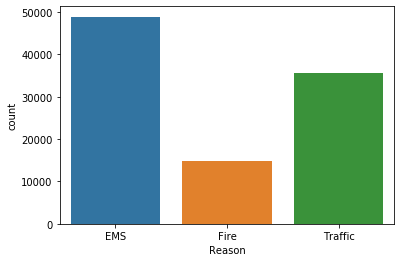

In [8]:
sns.countplot(x='Reason',data=df)    

In [9]:
type(df['timeStamp'].iloc[2])

str

In [10]:
#Used pd.to_datetime to convert the column from strings to DateTime objects 
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
#Used .apply() to create 3 new columns called Hour, Month, and Day of Week.
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month )
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)


In [12]:
#Used the .map() with this dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

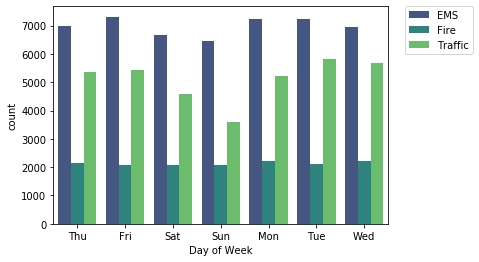

In [13]:
#Used seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)


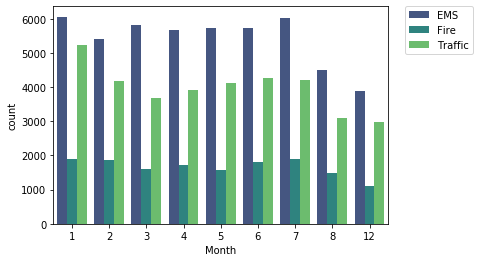

In [14]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)


In [15]:
#Creating a gropuby object called byMonth, where i group the DataFrame by the month column and use the count() method for aggregation
byMonth = df.groupby("Month")
byMonth.count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
7969,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:12:01,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,Fri
7970,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:17:00,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,Fri
7971,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:22:00,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,Fri
7972,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:27:01,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,Fri
7973,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:32:01,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,Fri


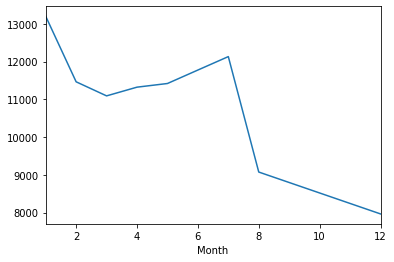

In [17]:
byMonth['twp'].plot()

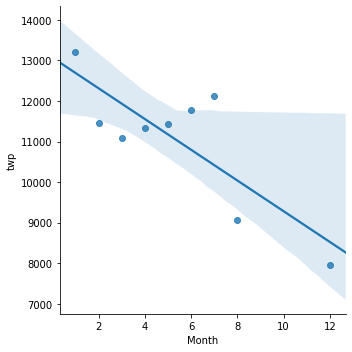

In [18]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [19]:
#Creating a new column called 'Date' that contains the date from the timeStamp column
t = df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

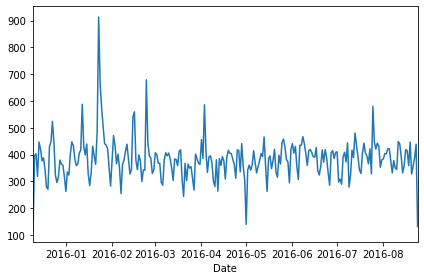

In [20]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

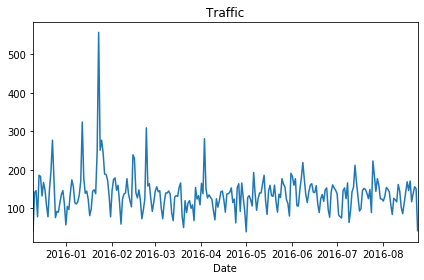

In [22]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot(title='Traffic')
plt.tight_layout()                                                                                      

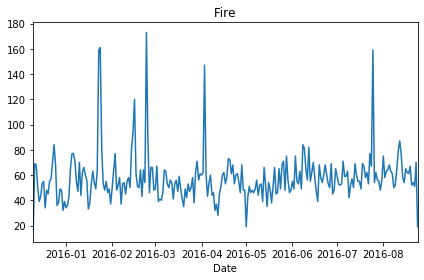

In [23]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot(title='Fire')
plt.tight_layout()

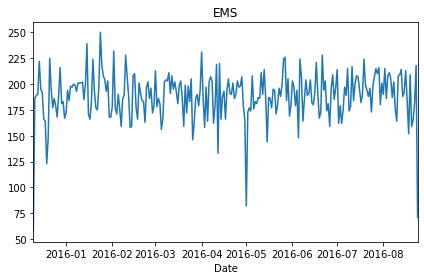

In [24]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot(title='EMS')
plt.tight_layout()  

In [26]:
#Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week
byDayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

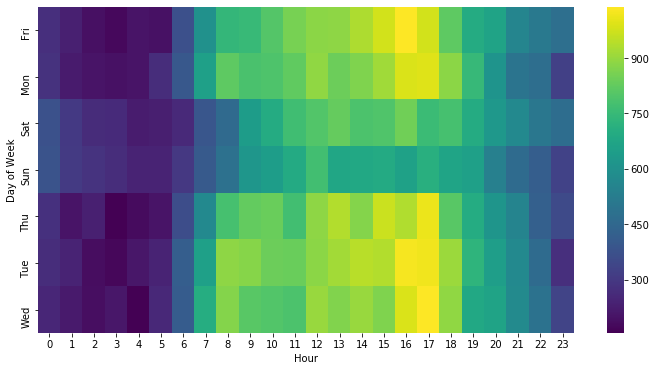

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(byDayHour,cmap='viridis')

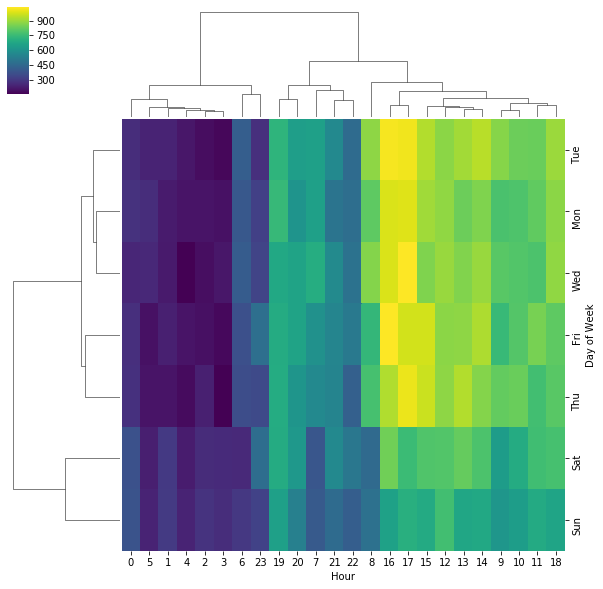

In [28]:
sns.clustermap(byDayHour,cmap='viridis')

In [29]:
#Making the DataFrame show the Month as the column
byDayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
byDayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


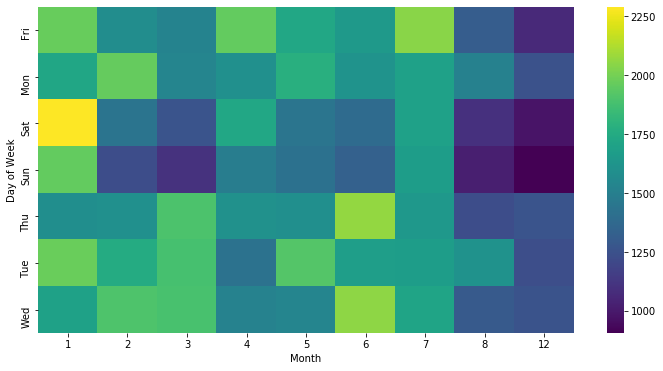

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(byDayMonth,cmap='viridis')

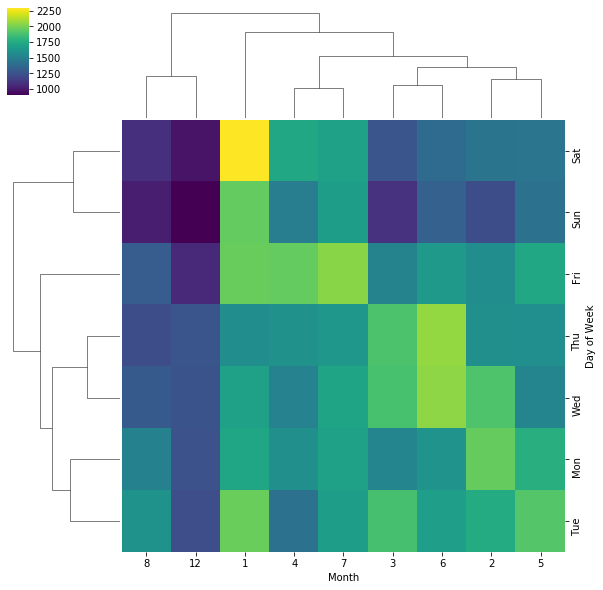

In [31]:
sns.clustermap(byDayMonth,cmap='viridis') 